In [1]:
#| export
verbose                       = 1
check_memory_usage            = True
time_flag                     = True
window_size_percentage        = True
show_plots                    = True
reset_kernel                  = False
pre_configured_case           = True
case_id                       = 7
frequency_factor              = 1
frequency_factor_change_alias = True
check_parameters              = True
cuda_device                   = 0
remove_lambdas_flag           = True

MOIRAI: Toy complete execution

In [2]:
import torch
import matplotlib.pyplot as plt
import pandas as pd
from gluonts.dataset.pandas import PandasDataset
from gluonts.dataset.split import split
from huggingface_hub import hf_hub_download

from uni2ts.eval_util.plot import plot_single
from uni2ts.model.moirai import MoiraiForecast, MoiraiModule
import sys
import dvats.utils as ut
import torch
import matplotlib.pyplot as plt
import pandas as pd
from gluonts.dataset.pandas import PandasDataset
from gluonts.dataset.split import split
from huggingface_hub import hf_hub_download

import uni2ts
from uni2ts.eval_util.plot import plot_single
from uni2ts.model.moirai import MoiraiForecast, MoiraiModule
from uni2ts.eval_util.plot import plot_next_multi
import pyarrow.feather as ft
from gluonts.transform.split import TFTInstanceSplitter
from gluonts.transform.sampler import TestSplitSampler
import numpy as np
import einops
import torch.nn.functional as F
from dvats.memory import gpu_memory_status

In [3]:
#| export
device = torch.device(f'cuda:{cuda_device}' if torch.cuda.is_available() else 'cpu')
torch.cuda.set_device(device)
if check_memory_usage:
    gpu_device = torch.cuda.current_device()
    gpu_memory_status(gpu_device)

GPU | Used mem: 14
GPU | Used mem: 24
GPU | Memory Usage: [███████████---------] 58%


In [4]:
import dvats.config as cfg_

In [5]:
cfg_.show_available_configs()

Available datasets: 
0 - monash_australian_electricity_demand_0
1 - monash_solar_4_seconds_0
2 - wikipedia_0
3 - traffic_san_francisco_0
4 - monash_solar_10_minutes_0
5 - etth1_0
6 - stumpy_abp_0
7 - stumpy_toy_0


In [6]:
#| export
import warnings
warnings.filterwarnings("ignore", module="umap")
import os
import sys
sys.path.append(os.path.abspath('..'))
from dvats.all import *
from fastcore.all import *
from tsai.basics import *
from tsai.models.InceptionTimePlus import *
from tsai.callback.MVP import *
import matplotlib.colors as colors
from fastai.callback.wandb import WandbCallback
from fastai.callback.progress import ShowGraphCallback
from fastai.callback.schedule import *
from fastai.callback.tracker import EarlyStoppingCallback
import wandb
from momentfm import MOMENTPipeline
import torch
import matplotlib.pyplot as plt
import pandas as pd
from gluonts.dataset.pandas import PandasDataset
from gluonts.dataset.split import split
from huggingface_hub import hf_hub_download

from uni2ts.eval_util.plot import plot_single
from uni2ts.model.moirai import MoiraiForecast, MoiraiModule
from uni2ts.eval_util.plot import plot_next_multi

<frozen importlib._bootstrap>:241: RuntimeWarning: pyarrow.lib.IpcWriteOptions size changed, may indicate binary incompatibility. Expected 72 from C header, got 88 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: pyarrow.lib.IpcReadOptions size changed, may indicate binary incompatibility. Expected 96 from C header, got 104 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: pyarrow.lib.Tensor size changed, may indicate binary incompatibility. Expected 64 from C header, got 80 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: pyarrow.lib.NativeFile size changed, may indicate binary incompatibility. Expected 96 from C header, got 104 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: pyarrow.lib.BufferedInputStream size changed, may indicate binary incompatibility. Expected 96 from C header, got 104 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: pyarrow.lib.BufferedOutputStream size changed, may indicate binary 


Octave is ready <oct2py.core.Oct2Py object at 0x7f3805f38610>

















In [7]:
#| export
user, project, version, data, config, job_type = cfg_.get_artifact_config_MVP(False)
if pre_configured_case: 
    cfg_.force_artifact_config_mvp(
        config = config,
        id = case_id,
        verbose = verbose, 
        both = verbose > 0,
        frequency_factor = frequency_factor,
        frequency_factor_change_alias = frequency_factor_change_alias
    )

r: 0.71
use_wandb: True
norm_use_by_single_batch is missing in original dict | (False,) 
norm_use_single_batch: False
wandb_group: None
batch_size: 512
valid_artifact: None
epochs: 100
mvp_ws: (15, 100) -> [1, 2160]
mask_sync: False
stride: 900 -> 144
mask_future: False
data_cols is missing in original dict | [0] 
valid_size: 0.2
mask_stateful: True
norm_by_sample: False
time_col is missing in original dict | None 
data_fpath is missing in original dict | ~/data/solar_10_minutes_dataset.tsf 
artifact_name is missing in original dict | Monash-Solar_10_minutes 
csv_config is missing in original dict | {} 
freq is missing in original dict | 10min 
analysis_mode: online
train_artifact: mi-santamaria/deepvats/PulsusParadoxus-SP02:latest -> mi-santamaria/deepvats/Monash-Solar_10_minutes:latest
alias: PulsusParadoxus-SP02 -> Monash-Solar_10_minutes
w: 100 -> 2160


In [8]:
#| export
path = os.path.expanduser("~/work/nbs_pipeline/")
name="02c_encoder_moment-embedding"
os.environ["WANDB_NOTEBOOK_NAME"] = path+name+".ipynb"
runname=name
if verbose > 0: print("runname: "+runname)
if verbose > 0: cfg_.show_attrdict(config)

runname: 02c_encoder_moment-embedding
alias: Monash-Solar_10_minutes
analysis_mode: online
batch_size: 512
epochs: 100
mask_future: False
mask_stateful: True
mask_sync: False
mvp_ws: [1, 2160]
norm_by_sample: False
norm_use_single_batch: False
r: 0.71
stride: 144
train_artifact: mi-santamaria/deepvats/Monash-Solar_10_minutes:latest
valid_artifact: None
use_wandb: True
valid_size: 0.2
w: 2160
wandb_group: None
artifact_name: Monash-Solar_10_minutes
data_cols: [0]
data_fpath: ~/data/solar_10_minutes_dataset.tsf
freq: 10min
time_col: None
csv_config: {}
norm_use_by_single_batch: (False,)


In [9]:
#| export
if verbose > 0: print("--> Wandb init")
run = wandb.init(
    entity = user,
    # work-nbs is a place to log draft runs
    project=project,
    group=config.wandb_group,
    job_type=job_type,
    allow_val_change=True,
    mode=config.analysis_mode,
    config=config,
    # When use_wandb is false the run is not linked to a personal account
    #NOTE: This is not working right now
    anonymous = 'never' if config.use_wandb else 'must', 
    resume=False,
    name = runname
)
if verbose > 0: print("Wandb init -->")
config = run.config  # Object for storing hyperparameters
artifacts_gettr = run.use_artifact if config.use_wandb else wandb_api.artifact

--> Wandb init


wandb: WARNING WANDB_NOTEBOOK_NAME should be a path to a notebook file, couldn't find /home/macu/work/nbs_pipeline/02c_encoder_moment-embedding.ipynb.
wandb: Currently logged in as: mi-santamaria. Use `wandb login --relogin` to force relogin


Wandb init -->


In [10]:
#| export
config = run.config  # Object for storing hyperparameters
if verbose > 0: cfg_.show_attrdict(config)
artifacts_gettr = run.use_artifact if config.use_wandb else wandb_api.artifact
train_artifact = artifacts_gettr(config.train_artifact)
if verbose > 0: print("---> W&B Train Artifact")

alias: Monash-Solar_10_minutes
analysis_mode: online
batch_size: 512
epochs: 100
mask_future: False
mask_stateful: True
mask_sync: False
mvp_ws: [1, 2160]
norm_by_sample: False
norm_use_single_batch: False
r: 0.71
stride: 144
train_artifact: mi-santamaria/deepvats/Monash-Solar_10_minutes:latest
valid_artifact: None
use_wandb: True
valid_size: 0.2
w: 2160
wandb_group: None
artifact_name: Monash-Solar_10_minutes
data_cols: [0]
data_fpath: ~/data/solar_10_minutes_dataset.tsf
freq: 10min
time_col: None
csv_config: {}
norm_use_by_single_batch: [False]
---> W&B Train Artifact


In [11]:
#| export
import pyarrow.feather as ft
df_train = train_artifact.to_df()
df_train.shape

wandb:   1 of 1 files downloaded.  


(52560, 1)

In [ ]:
print(df_train.shape)
#display(df_train.head())
display(df_train[10:15]

In [13]:
#| export
if verbose > 0: print("---> Sliding window | ", config.w,  " | ", config.stride )
sw = SlidingWindow(window_len=config.w, stride=config.stride, get_y=[])
if verbose > 0: print(" Sliding window | ", config.w,  " | ", config.stride, "---> | df_train ~ ", df_train.shape )
X_train, _ = sw(df_train)
if verbose > 0: print(" sw_df_train | ", config.w,  " | ", config.stride, "--->" )

---> Sliding window |  2160  |  144
 Sliding window |  2160  |  144 ---> | df_train ~  (52560, 1)
 sw_df_train |  2160  |  144 --->


In [14]:
# n_win x n_vars x win_size
# n_batches x n_features x patch_size (before padding)
X_train.shape

(351, 1, 2160)

len(X):  351
--> Split 1


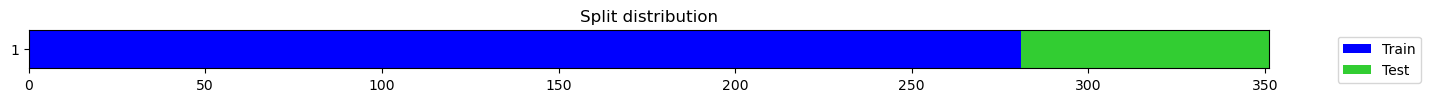

Split --> 281


In [15]:
assert config.analysis_mode in ['offline','online'], 'Invalid analysis mode'

X = X_train
if verbose > 0: print("len(X): ", len(X));
if config.analysis_mode == 'online':
    if verbose > 0: print("--> Split 1")
    splits = TimeSplitter(valid_size=0.2, show_plot=show_plots)(X)
elif config.analysis_mode == 'offline':
    if verbose > 0: print("--> Split 2")
    splits = get_splits(np.arange(len(X)), valid_size=config.valid_size, show_plot = show_plots)
if verbose > 0: 
    print("Split -->", len(splits[0]))

In [16]:
#| hide
if verbose > 0: 
    print(X.shape)
    display(splits)
    

(351, 1, 2160)


((#281) [0,1,2,3,4,5,6,7,8,9...],
 (#70) [281,282,283,284,285,286,287,288,289,290...])

In [17]:
len(splits)
len(splits[0])

281

In [18]:
X_train.shape

(351, 1, 2160)

Ñapa para ver si es un problema de tamaños o qué (dejar 1 ventana solo como en el  ejemplo de uso)

In [19]:
#X_train = X_train[0]
#X_train = einops.rearrange(  torch.as_tensor(X_train, dtype = torch.float32), "... -> 1 ...")
#X_train.shape

Hasta aquí la ñapa

In [20]:
past_target = einops.rearrange(
    torch.as_tensor(X_train, dtype = torch.float32),
    "n_windows n_vars window_size -> n_windows window_size n_vars"
)
# 1s if the value is observed, 0s otherwise. Shape: (batch, time, variate)
past_observed_target = torch.ones_like(past_target, dtype=torch.bool)
# 1s if the value is padding, 0s otherwise. Shape: (batch, time)
past_is_pad = torch.zeros_like(past_target, dtype=torch.bool)[...,:,-1] # Kill last dimension

In [21]:
print(past_target.shape)
print(past_observed_target.shape)
print(past_is_pad.shape)

torch.Size([351, 2160, 1])
torch.Size([351, 2160, 1])
torch.Size([351, 2160])


In [22]:
#patch_size = 32 -> ok
patch_size = 8

In [23]:
observed_mask = torch.ones_like(past_target, dtype = bool)


¿ Pero tiene sentido separar en Train y test en un zero - shot ? 
Cojámoslo entero
Y cojamos todo como input en lugar de input y label

In [24]:
module = MoiraiModule.from_pretrained(f"Salesforce/moirai-1.1-R-small")

In [25]:
# Auxiliar model for conversions just to ensure correct sizes
forecast_model =  MoiraiForecast(
    module=module,
    prediction_length=past_target.shape[2], #random, just for getting the model
    context_length=past_target.shape[1],
    patch_size=patch_size,
    num_samples=100, #Random, is the number of forecasting, not interesting for us
    target_dim=past_target.shape[2],
    feat_dynamic_real_dim=0,
    past_feat_dynamic_real_dim=0,
)

In [26]:
forecast = forecast_model(
    past_target=past_target,
    past_observed_target=past_observed_target,
    past_is_pad=past_is_pad,
)

KeyboardInterrupt: 

In [ ]:
(
    target,
    observed_mask,
    sample_id,
    time_id,
    variate_id,
    prediction_mask,
) = forecast_model._convert(
    patch_size,
    past_target,
    past_observed_target,
    past_is_pad
)

In [ ]:
from fastai.callback.hook import *

from tsai.models.layers import *

def get_acts_and_grads(
    model, 
    modules, 
    y=None, 
    detach=True, 
    cpu=False,
    attr_name = "data",
    verbose = 0,
    **model_kwargs
):
    r"""Returns activations and gradients for given modules in a model and a single input or a batch. 
    Gradients require y value(s). If they are not provided, it will use the predictions. """
    if not isinstance(modules, list): modules = [modules]
    if ('x' in model_kwargs):
        x = x[None, None] if x.ndim == 1 else x[None] if x.ndim == 2 else x
    if cpu: 
        model = model.cpu()
        #x = x.cpu()
        for key in model_kwargs:
            try: #if not able to be moved, just not move it
                model_kwargs[key] = model_kwargs[key].cpu()
            except:
                continue
    with hook_outputs(modules, detach=detach, cpu=cpu) as h_act:
        if verbose > 0:
            print("get_act_and_grads | hook outputs | h_act")
        with hook_outputs(modules, grad=True, detach=detach, cpu=cpu) as h_grad:
            if verbose > 0:
                print("get_act_and_grads | hook outputs | h_grad")
            preds = model.eval()(**model_kwargs)
            try:
                preds.requires_grad_(True)
                if verbose > 1:
                    print(f"Get_acts_and_grads | hooks | preds req grads ? {preds.requires_grad}")
                #print(f"Get_acts_and_grads | hooks | preds ? {preds}")
                if y is None: 
                    preds.max(dim=-1).values.mean().backward()
                    #print(f"Get_acts_and_grads | hooks | preds grad ? {preds.grad}")
                else: 
                    y = y.detach().cpu().numpy()
                    if preds.shape[0] == 1: 
                        preds[0, y].backward()
                    else: 
                        if y.ndim == 1: y = y.reshape(-1, 1)
                        torch_slice_by_dim(preds, y).mean().backward()
            except Exception as e: 
                if verbose > 1:
                    print(f"Preds {type(preds)} does not have requires_grad")
    if len(modules) == 1: 
        if verbose > 1:
            print(f"get_act_and_grads | h_act stored ~ ", len(h_act.stored))
            print(f"get_act_and_grads | h_act stored: ", h_act.stored)
        try:
            res = getattr(h_act.stored[0], attr_name), getattr(h_act.stored[0][0], attr_name)
        except:
            res = getattr(h_act.stored[0][0], attr_name), getattr(h_act.stored[0][0][0], attr_name)
        return res
    else: 
        return [h.data for h in h_act.stored], [getattr(h_act.stored[0], attr_name) for h in h_grad.stored]

In [ ]:
model_kwargs={
    'target': target, 
    'observed_mask': observed_mask,
    'sample_id': sample_id,
    'time_id': time_id,
    'variate_id': variate_id,
    'prediction_mask': prediction_mask,
    'patch_size': torch.ones_like(sample_id, dtype = torch.float32)*patch_size
} 

In [ ]:
forecast_model_kwargs={
    'past_target': past_target, 
    'past_observed_target': past_observed_target,
    'past_is_pad': past_is_pad
} 

Pequeño trial porque se queda bloqueado y no entiendo por qué


In [ ]:
#predictor = forecast_model.create_predictor(batch_size = target.shape[0])
#forecasts = predictor.predict(target)

Fin del trial

In [ ]:
from dvats.utils import Time

In [ ]:
timer = Time()
timer.start()
module.eval()
embs = [
        get_acts_and_grads(
            model   = module,
            modules = module.encoder.norm,         
            cpu     = False,
            attr_name = "data",
            verbose = 0,
            **model_kwargs
        )[0] 
        for xb in target
    ]
timer.end()
timer.show()

Me da que MOIRAI va a perder la batalla por tiempo de obtención de embeddings. 

In [ ]:
embs[0].shape

In [ ]:
embs = embs[0]

In [ ]:
embs = embs.mean(axis=1)

In [ ]:
embs.shape

In [ ]:
def extract_embeddings_from_all_layers(model, enc_input, **model_kwargs):
    # Iteramos sobre todas las capas del modelo
    for name, module in model.named_modules():
        print(f"Processing layer: {name}")
        mssg = ""
        try:
            embs = [
                get_acts_and_grads(
                    model   = model,
                    modules = [module],  # Registramos el hook en la capa actual
                    cpu     = True,
                    attr_name = "data",  # Ajusta esto si necesitas otro atributo
                    **model_kwargs
                )[0] 
                for xb in enc_input
            ]
            mssg = f"Layer: {name}, Embedding shape: {embs[0].shape}" 
        except Exception as e:
            mssg = f"Layer: {name},  {e}"
        
        # Si se capturan las activaciones, imprimimos el nombre de la capa y su shape
        print(mssg)
        


In [ ]:
# ¿Por qué salen AffineTransformed objects en lugar de gradientes?
#extract_embeddings_from_all_layers(
#    model=module,
#    enc_input = target,
#    **model_kwargs
#)

In [ ]:
forecast_model.named_modules